In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

cash = pd.read_csv('../../project_dataset/cash_request.csv')

cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'],unit='ns')
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'],unit='ns')
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'],unit='ns')
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'],unit='ns')
cash['send_at'] = pd.to_datetime(cash['send_at'],unit='ns')
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'],unit='ns')
cash['reco_last_update'] = pd.to_datetime(cash['reco_last_update'],unit='ns')
cash['user_id'].fillna(cash['deleted_account_id'])

#prestamos_devueltos['month'] = prestamos_devueltos['created_at'].dt.to_period('M')
cash['hora'] = cash['created_at'].dt.hour
cash['weekday'] = cash['created_at'].dt.weekday
cash['day_name'] = cash['created_at'].dt.day_name()
cash


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,hora,weekday,day_name
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,19,1,Tuesday
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,19,1,Tuesday
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,19,1,Tuesday
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,19,1,Tuesday
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00:00,NaN,2020-06-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,9,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaT,NaN,2021-02-06 11:00:00+00:00,2020-10-13,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaT,NaT,13,0,Monday
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,NaN,NaT,30367.0,2020-11-03 22:00:00+00:00,2020-10-28,2020-12-01 13:26:53.787672+00:00,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,14,1,Tuesday
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-21,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,NaN,NaT,NaT,7,1,Tuesday
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-12,2021-02-05 13:14:19.689906+00:00,instant,2020-10-10 05:41:23.368363+00:00,NaN,NaT,NaT,5,5,Saturday


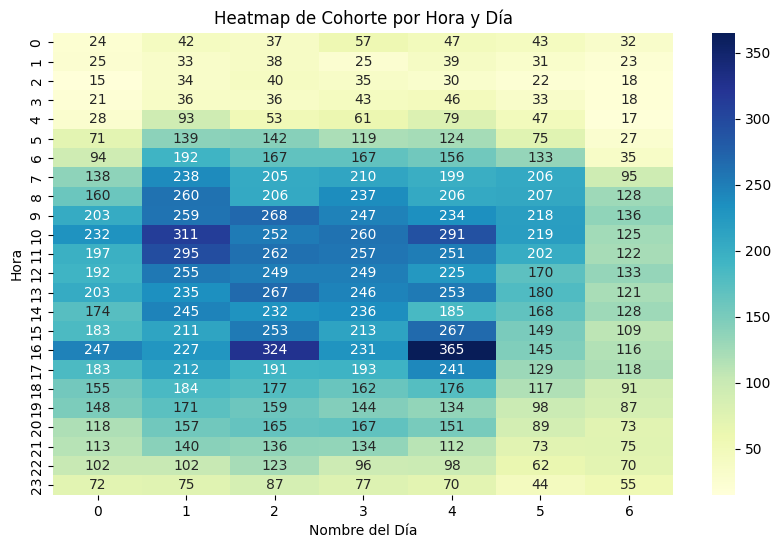

In [32]:
cohort_data = cash.groupby(['hora', 'weekday']).size().unstack(fill_value=0)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap de Cohorte por Hora y Día')
plt.xlabel('Nombre del Día')
plt.ylabel('Hora')
plt.show()

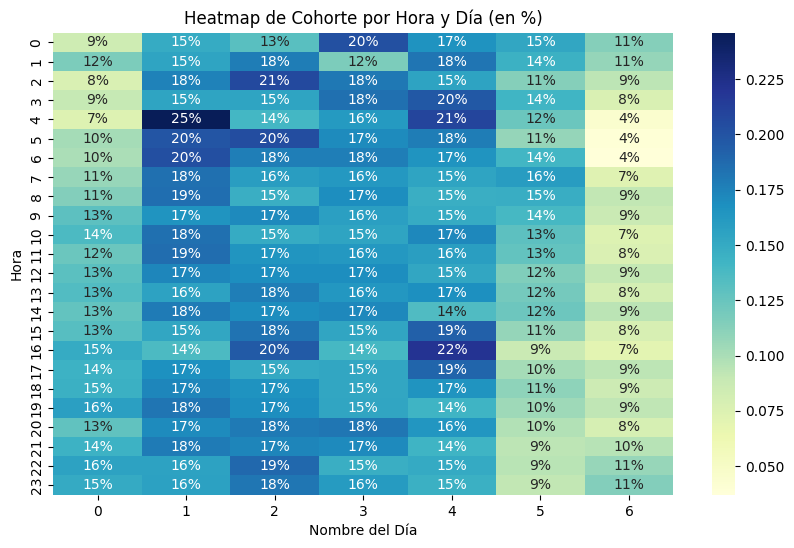

In [31]:
total_por_hora = cash.groupby('hora').size()
cohort_data_percent = cohort_data.div(total_por_hora, axis=0)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data_percent, cmap='YlGnBu', annot=True, fmt='.0%')
plt.title('Heatmap de Cohorte por Hora y Día (en %)')
plt.xlabel('Nombre del Día')
plt.ylabel('Hora')
plt.show()